In [8]:
import torch
from utils.func import show_gradient_maps
from models.Model import ConvNet

In [9]:
# Load the distilled file
data = torch.load('data/Distilled/mm-match_mnist_convnet.pt')
X_list = data['X']   # this was your X_syn
Y_list = data['Y']   # this was your Y_syn

# Suppose we want to use the *last* stage (or pick stage i-1):
stage = -1
X_syn = X_list[stage]  # Tensor of shape [synthetic_size, C, H, W]
Y_syn = Y_list[stage]  # Tensor of shape [synthetic_size, num_classes]

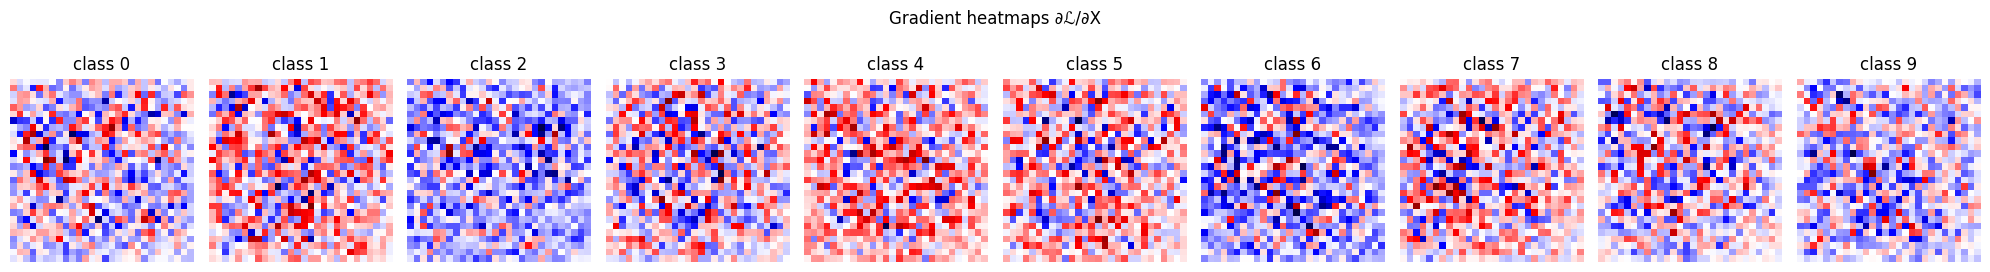

In [10]:
show_gradient_maps(ckpt_path        = "data/checkpoints/mm-match_mnist_convnet.pth",
                   model_cls        = ConvNet,
                   X_syn            = X_syn,
                   Y_syn            = Y_syn)